In [1]:
import torch
import pickle
import numpy as np
from glob import glob
from tqdm import tqdm
from datasets import load_dataset

In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Visualize Fisher Scores for Each Model (WRT Model)

In [3]:
with open('./Fisher/BERT/fisher_bert.pkl','rb') as fp:
    bert = pickle.load(fp)
with open('./Fisher/GPT2/fisher_gpt2.pkl','rb') as fp:
    gpt2 = pickle.load(fp)
with open('./Fisher/T5/fisher_t5.pkl','rb') as fp:
    t5 = pickle.load(fp)

In [4]:
bert_params = []
for x in bert:
    bert_params.extend(x.numpy().ravel().tolist())
gpt2_params = []
for x in gpt2:
    gpt2_params.extend(x.numpy().ravel().tolist())
t5_params = []
for x in t5:
    t5_params.extend(x.numpy().ravel().tolist())

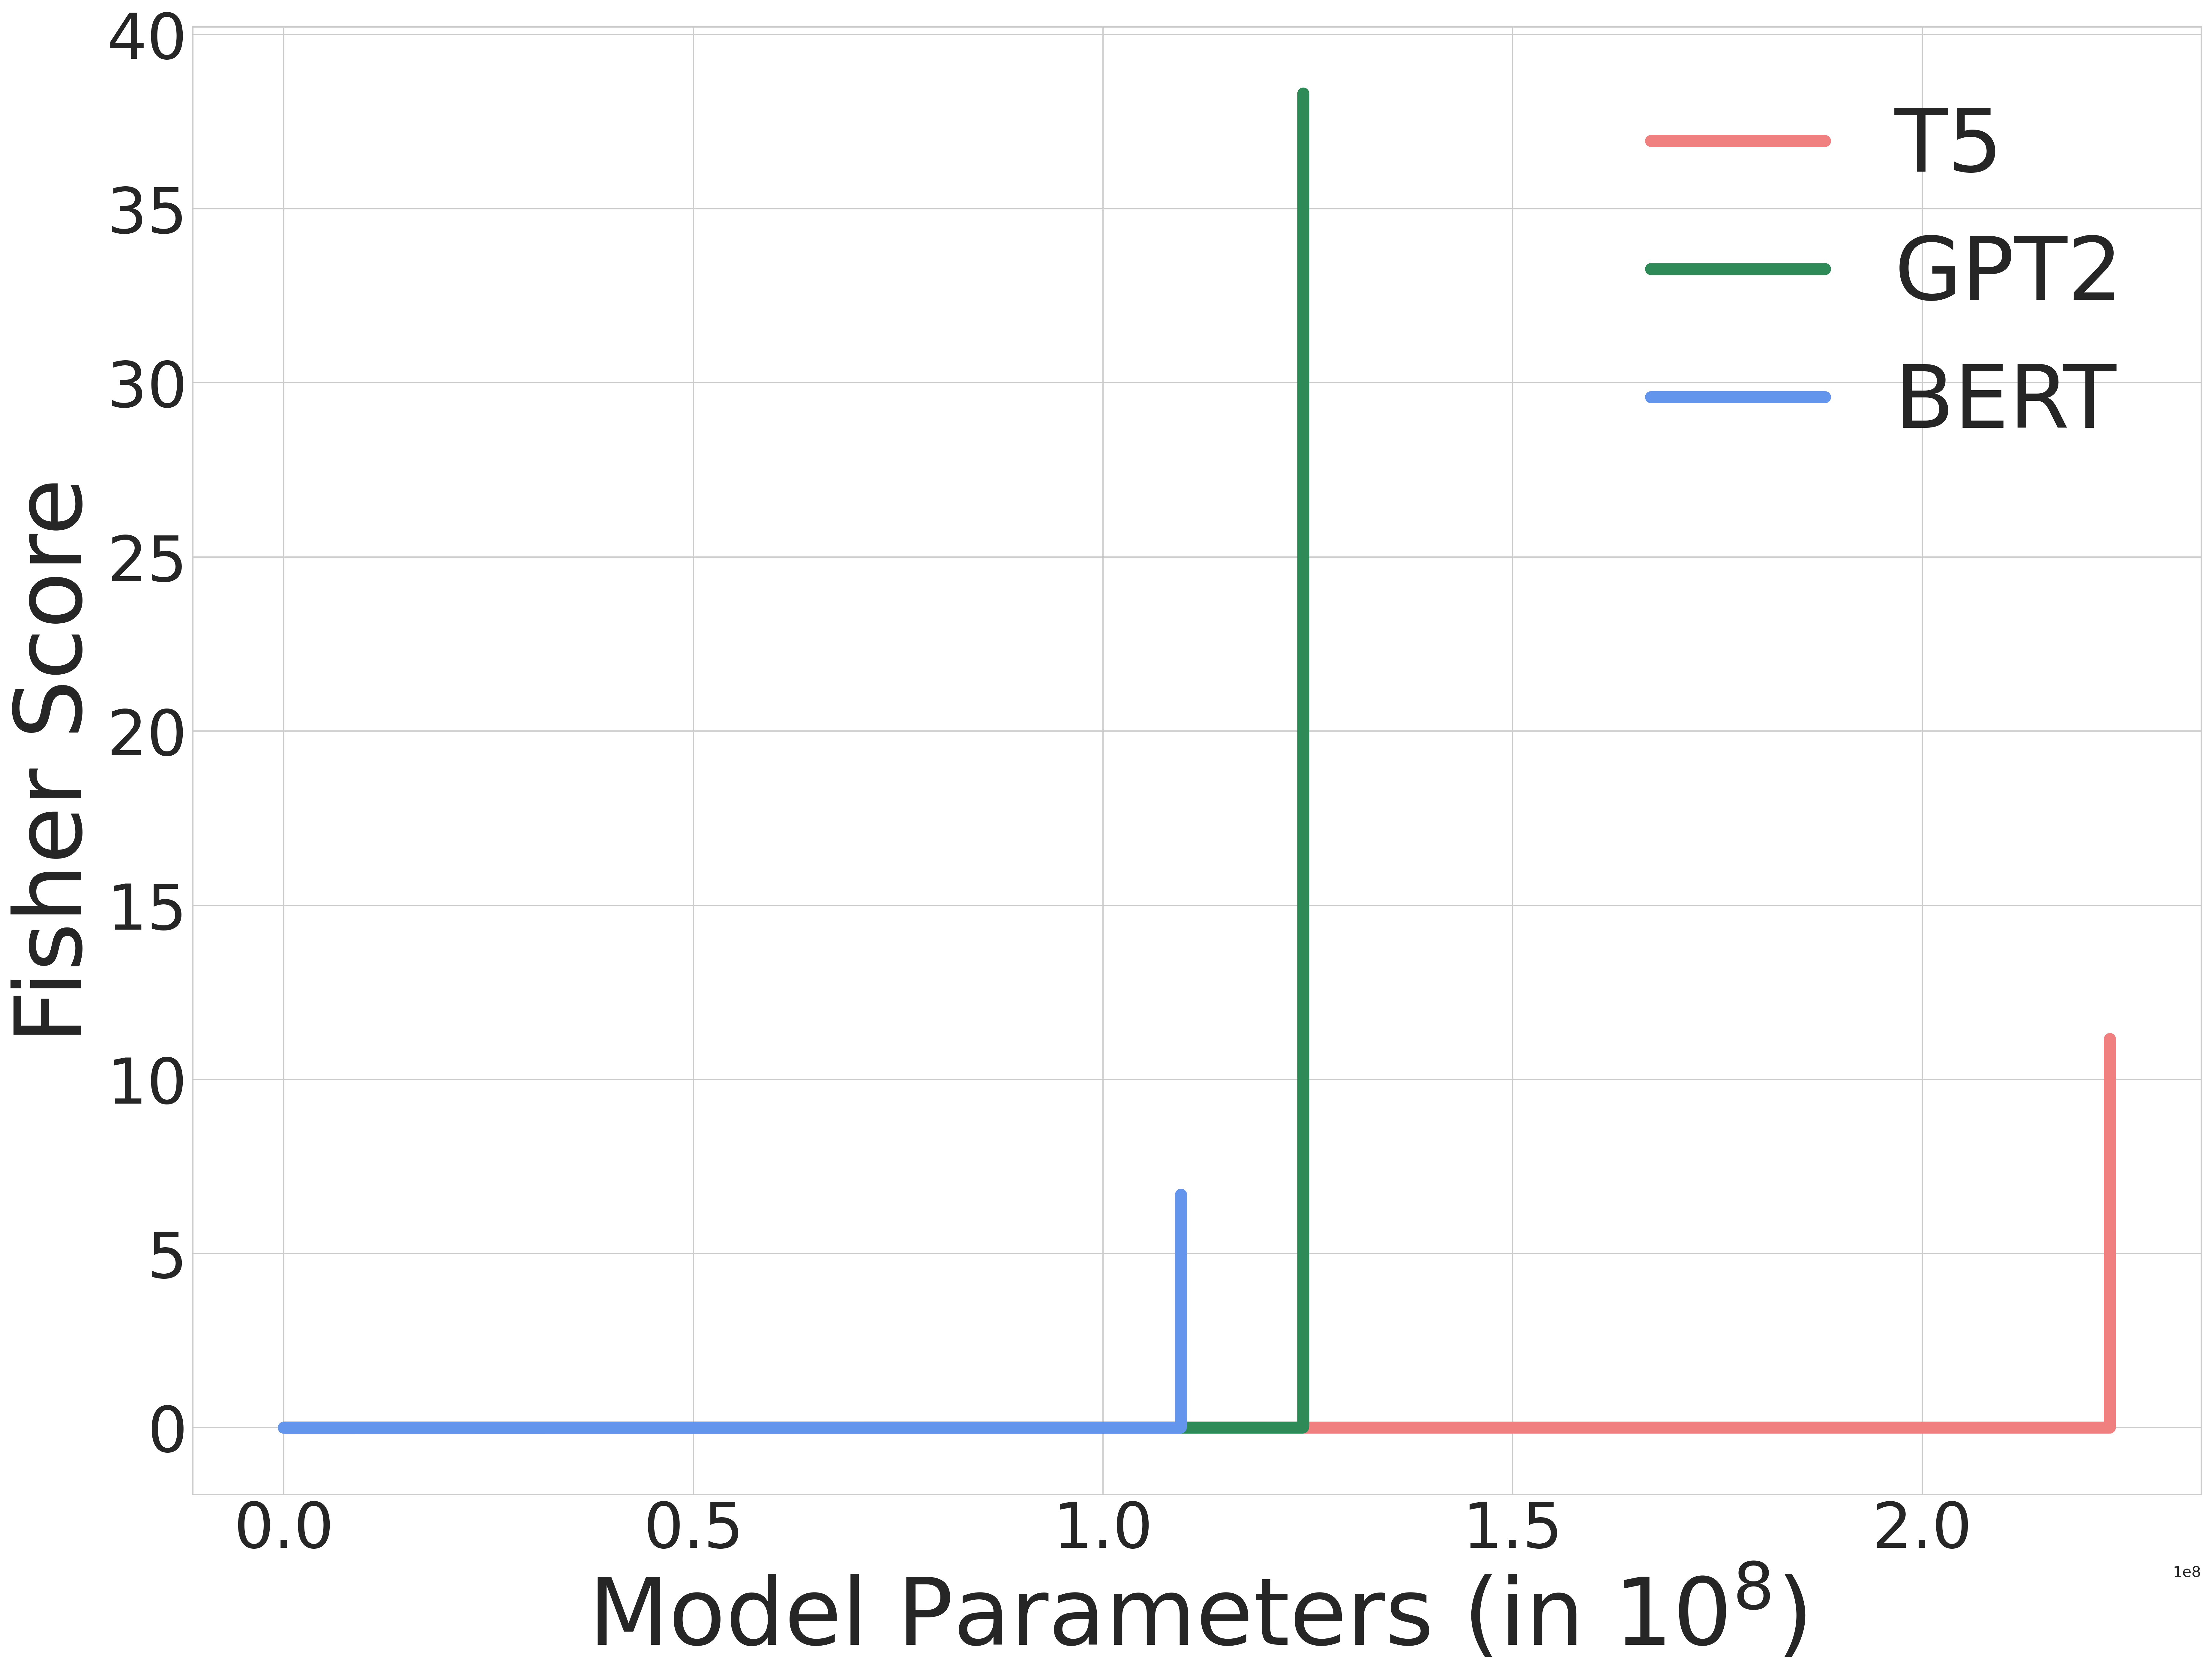

In [5]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(t5_params), linewidth=8, color = 'lightcoral', label = 'T5')
plt.plot(sorted(gpt2_params), linewidth=8, color = 'seagreen', label = 'GPT2')
plt.plot(sorted(bert_params), linewidth=8, color = 'cornflowerblue', label = 'BERT')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('Model Parameters (in $10^8$)', fontsize= 62)
plt.ylabel('Fisher Score', fontsize= 62)
plt.legend(prop={'size': 58}, loc = 'upper right', ncol=1 ,facecolor='floralwhite')
plt.show()

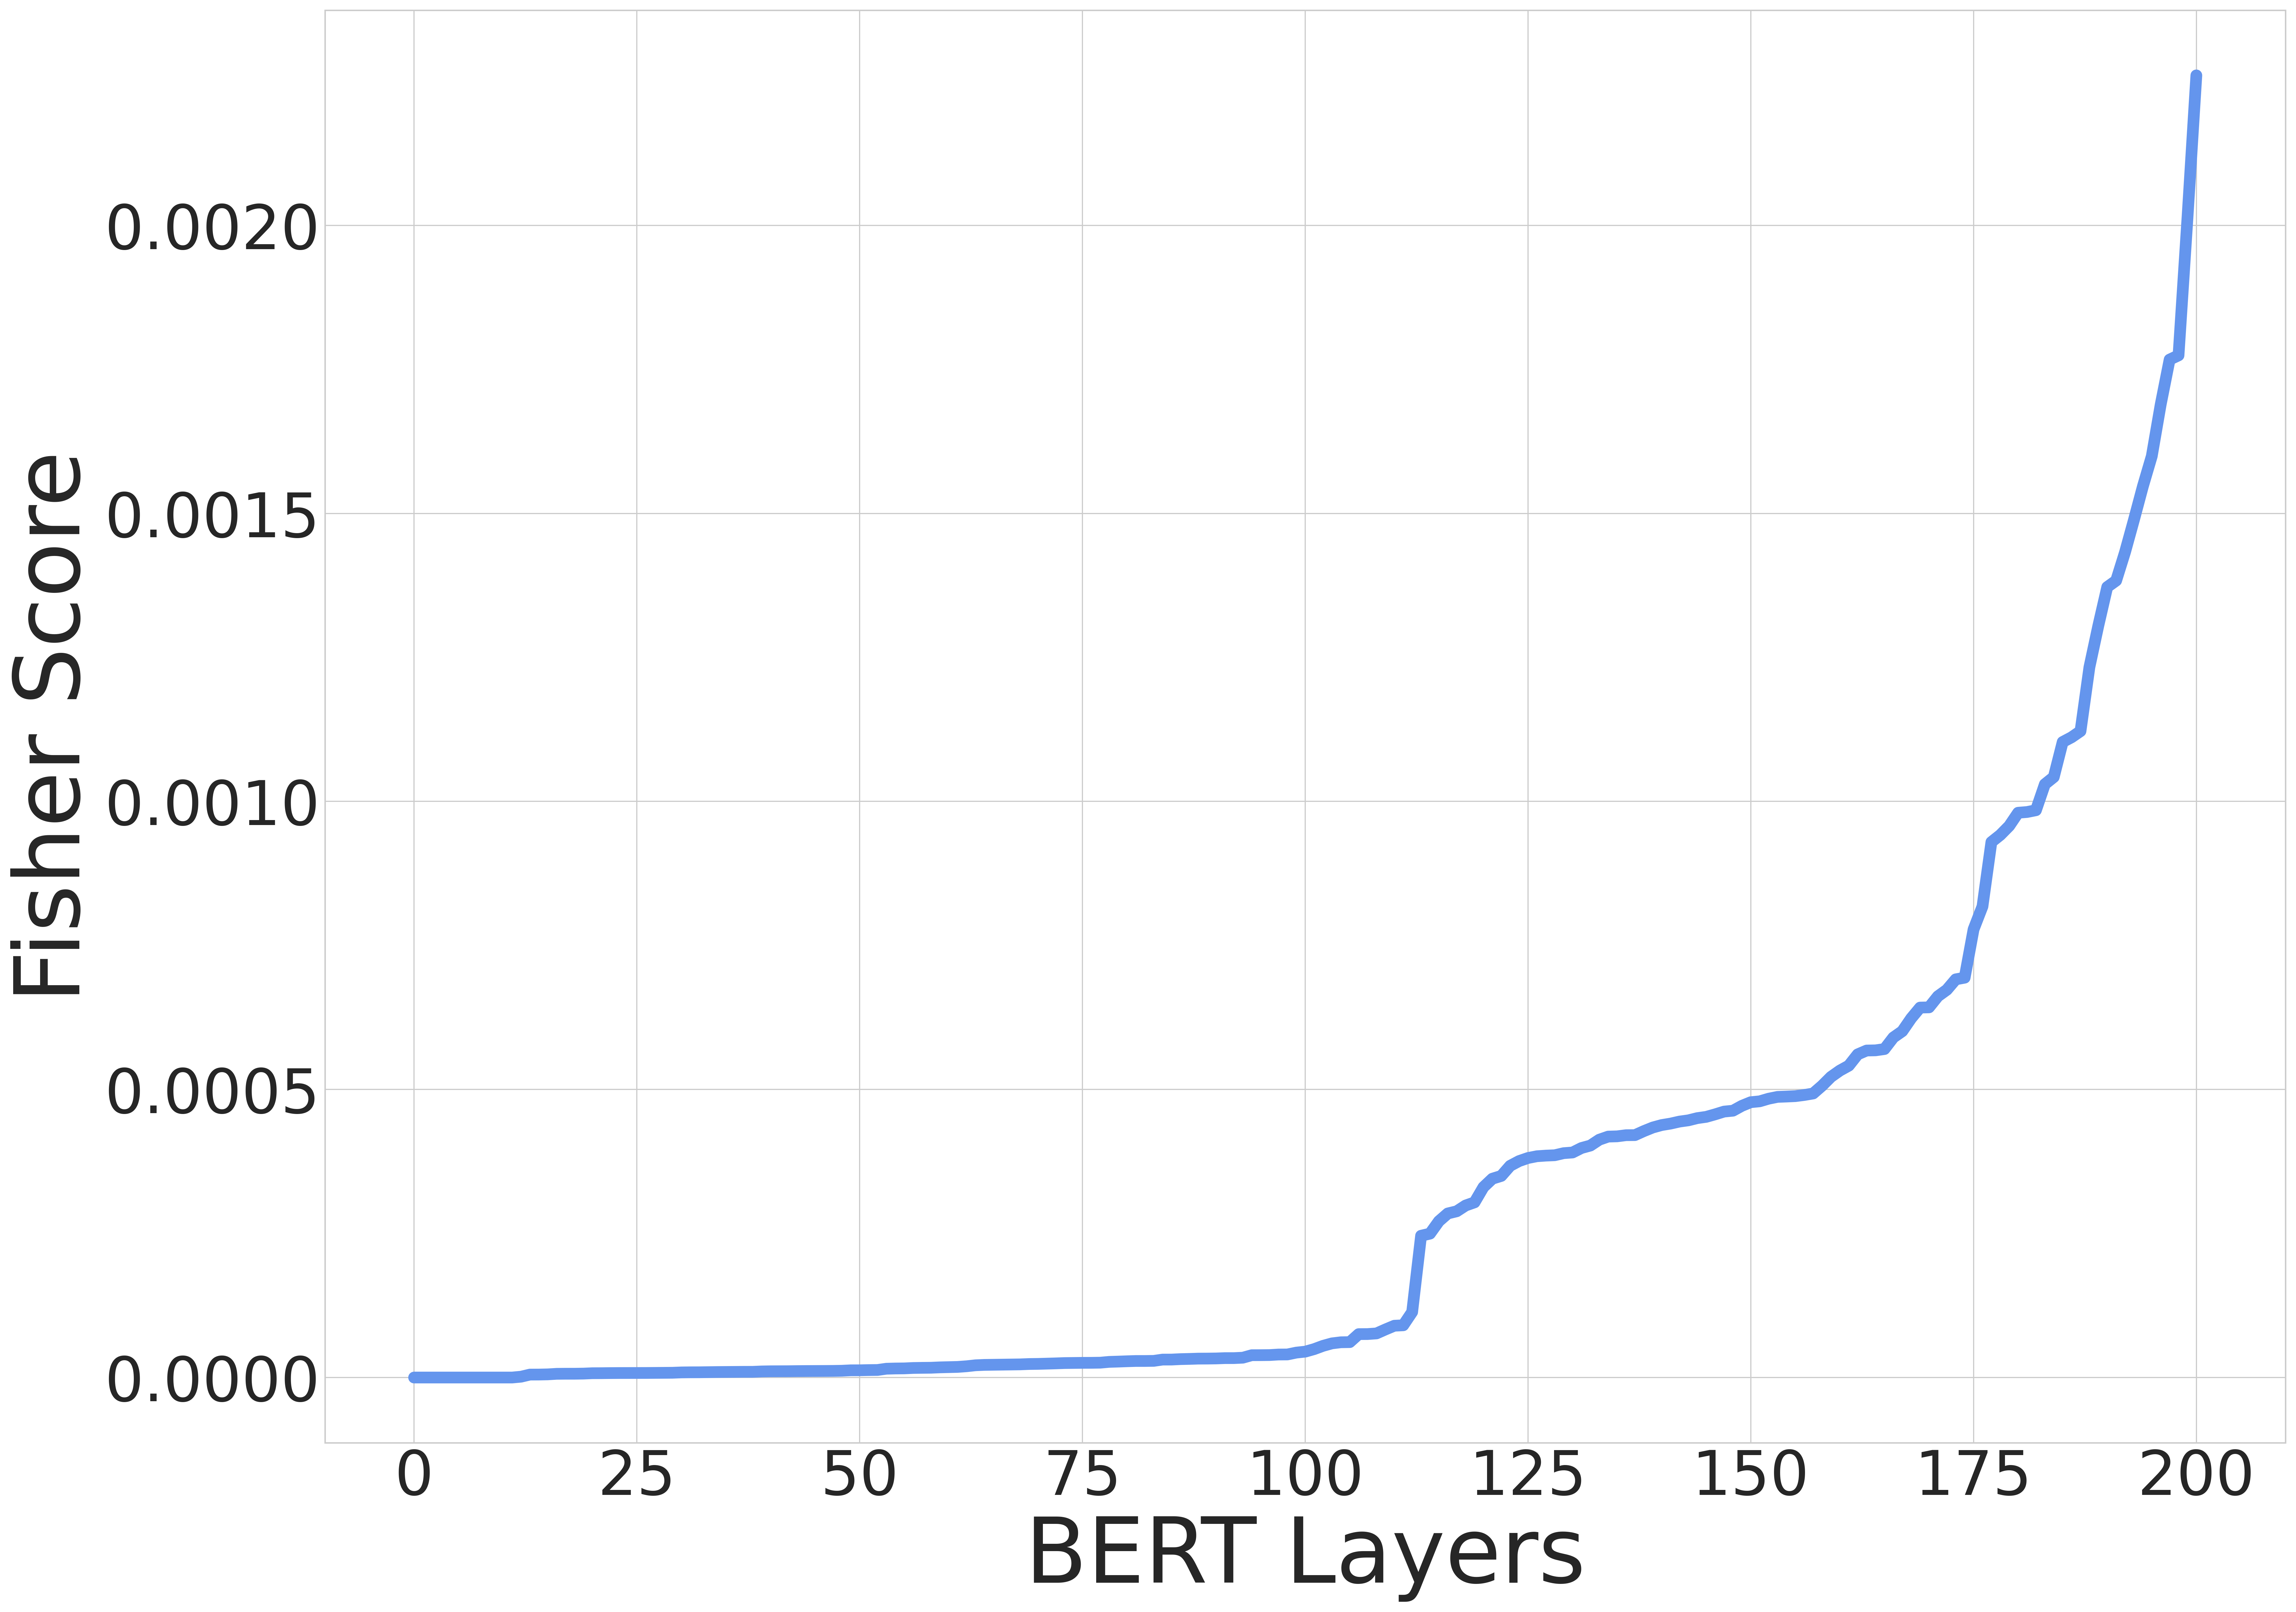

In [6]:
aggs = []
for i in range(len(bert)):
    aggs.append(np.mean(bert[i].ravel().numpy()))
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(aggs)[:-1], linewidth=8, color = 'cornflowerblue')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('BERT Layers', fontsize= 62)
plt.ylabel('Fisher Score', fontsize= 62)
plt.show()

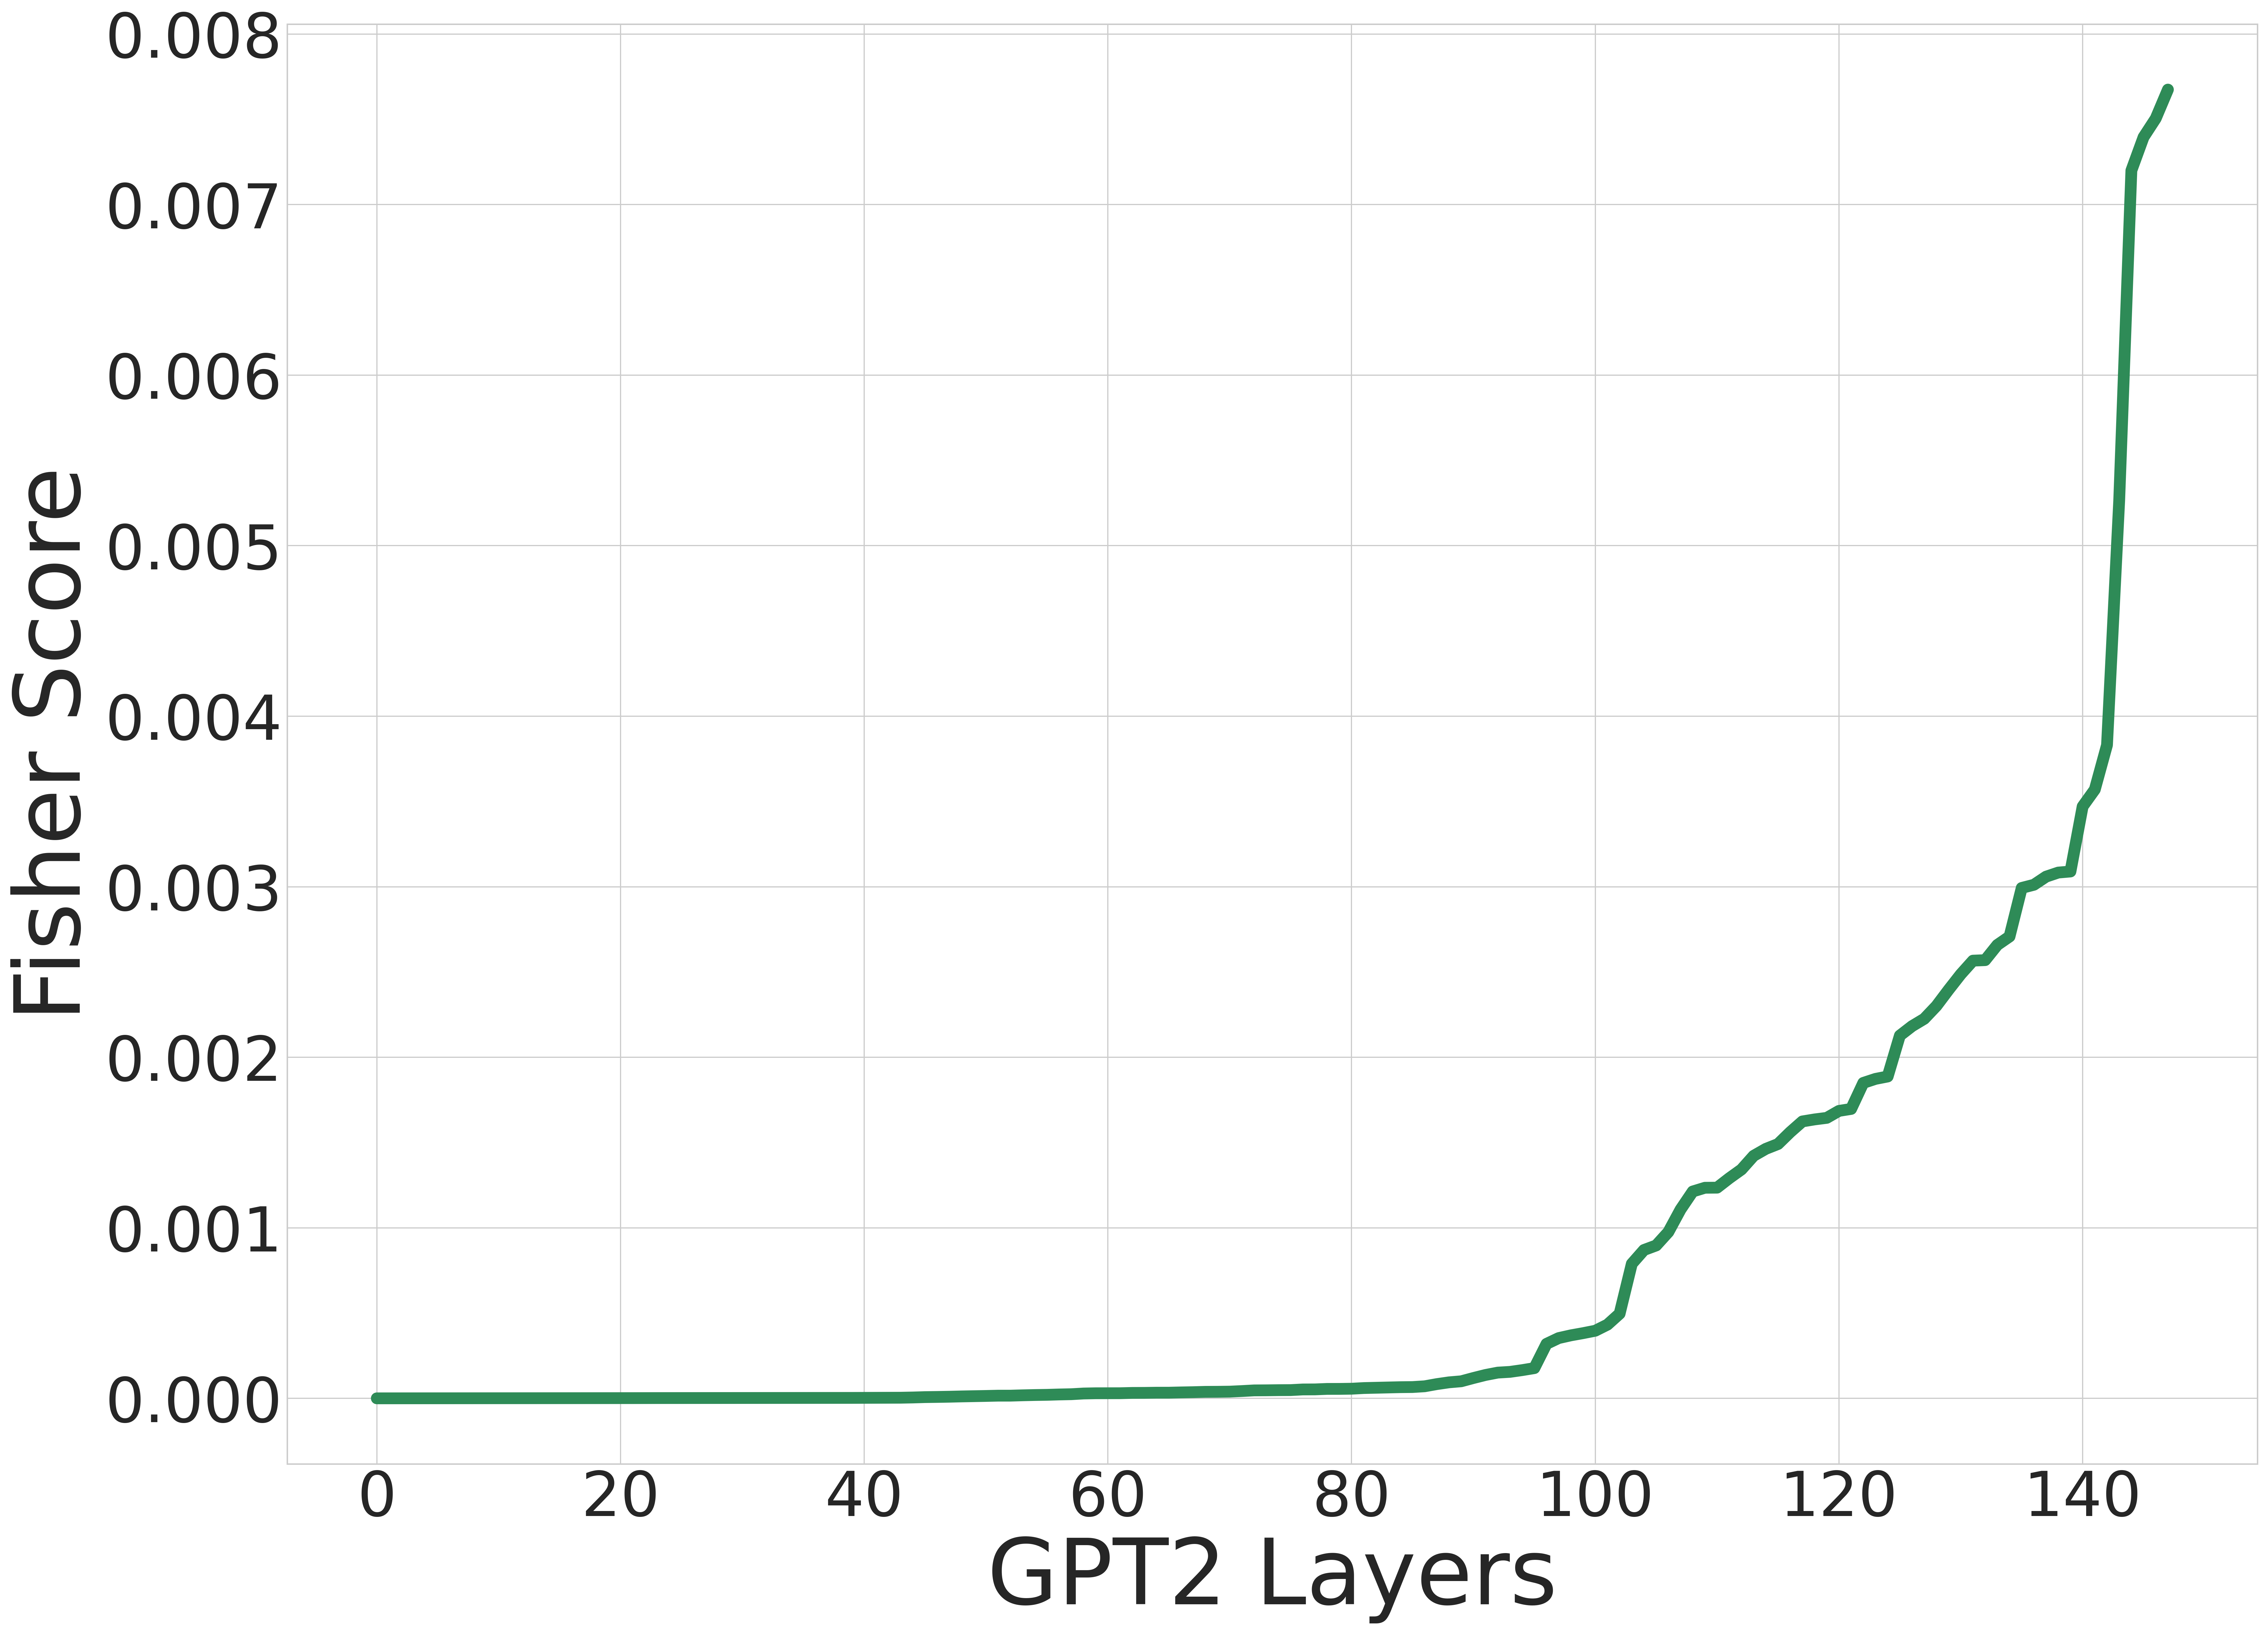

In [7]:
aggs = []
for i in range(len(gpt2)):
    aggs.append(np.mean(gpt2[i].ravel().numpy()))
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(aggs), linewidth=8, color = 'seagreen')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('GPT2 Layers', fontsize= 62)
plt.ylabel('Fisher Score', fontsize= 62)
plt.show()

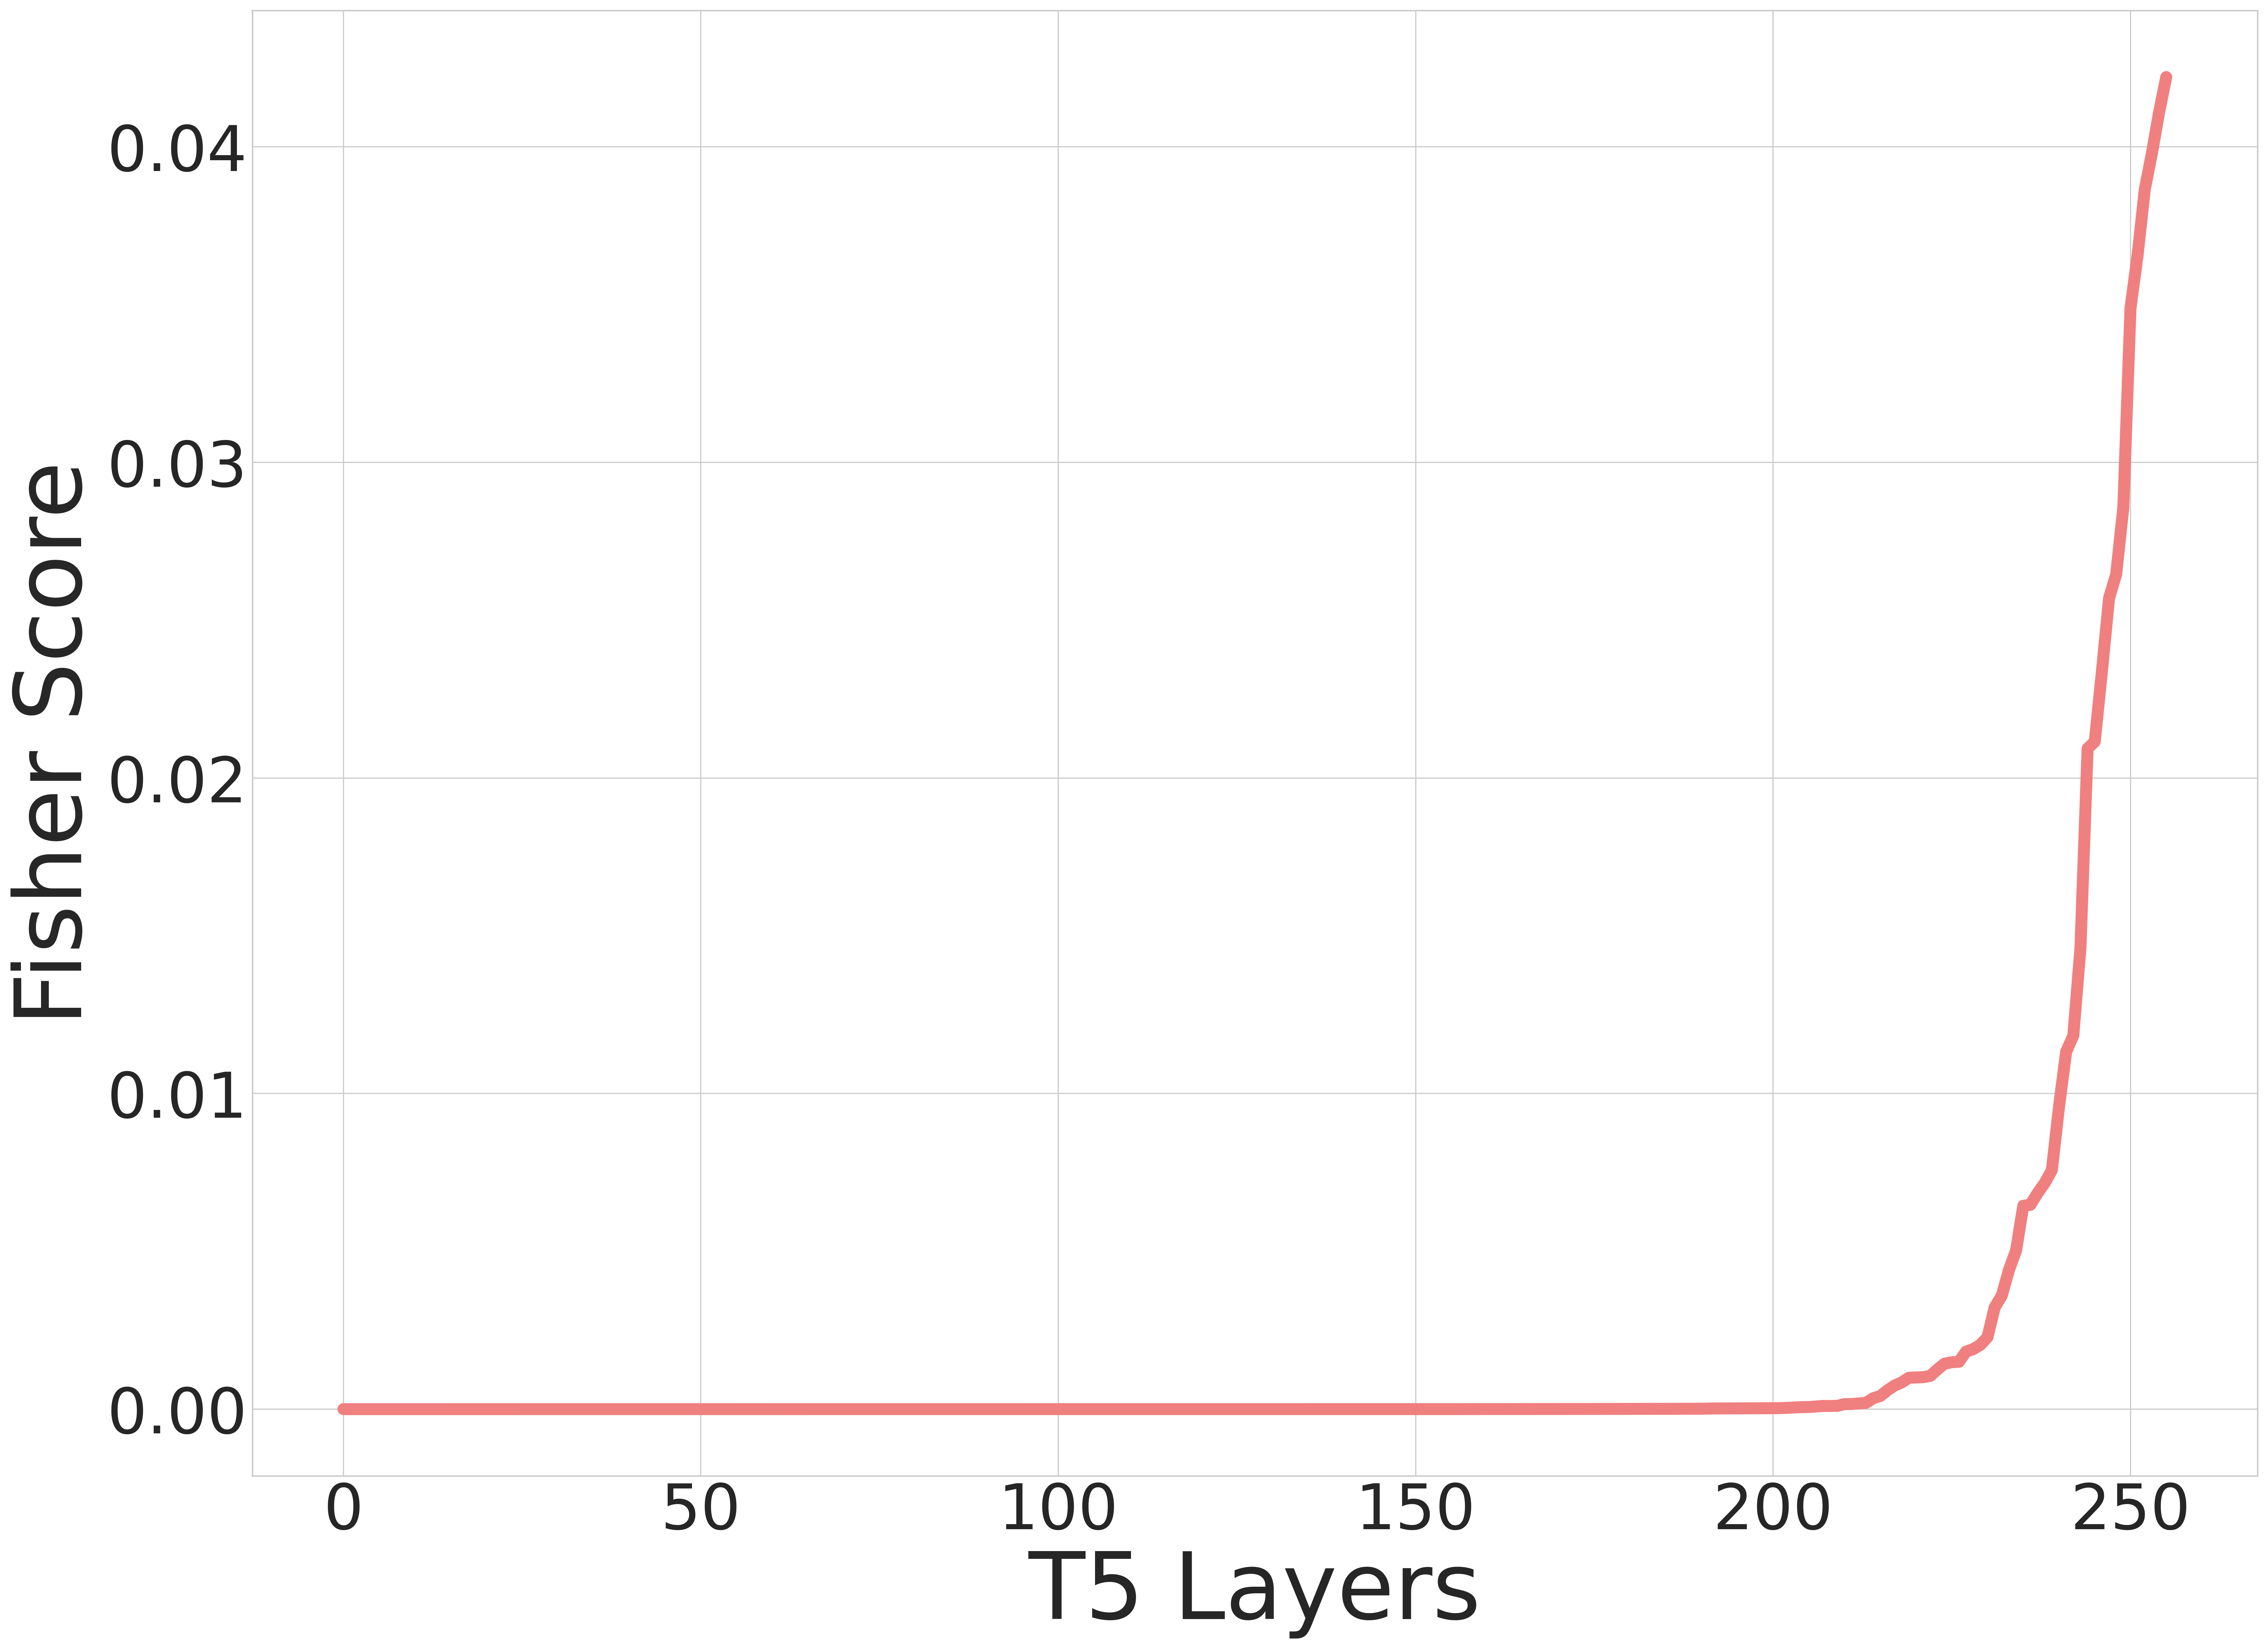

In [8]:
aggs = []
for i in range(len(t5)):
    aggs.append(np.mean(t5[i].ravel().numpy()))
    
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(24, 18), dpi=360)    
plt.plot(sorted(aggs)[:-1], linewidth=8, color = 'lightcoral')
plt.xticks(fontsize= 42)
plt.yticks(fontsize= 42)
plt.xlabel('T5 Layers', fontsize= 62)
plt.ylabel('Fisher Score', fontsize= 62)
plt.show()